## Importing the packages and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("creditcard_data.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## EDA and Preprocessing

In [3]:
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [4]:
# Checking unique values for various attributes to understand them better
df["Time"].value_counts()
df["Amount"].value_counts()

1.00       6176
1.98       2501
9.99       2059
0.89       2012
15.00      1501
           ... 
2928.58       1
174.64        1
287.34        1
23.61         1
716.61        1
Name: Amount, Length: 22320, dtype: int64

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
df.shape

(130943, 31)

In [7]:
df.dropna(inplace=True)

In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130937,79463,1.147068,-0.383945,1.005085,-0.851019,-0.992537,-0.127184,-0.694440,0.193771,1.422278,...,0.089589,0.544450,-0.003131,0.270160,0.397354,-0.689634,0.111838,0.025494,1.00,0.0
130938,79463,-2.202675,-0.892593,0.436432,1.523907,0.764082,-1.593149,0.016452,0.018566,-0.768651,...,-0.582835,-0.767617,1.938239,0.403147,-0.580063,0.163953,0.129860,-0.169588,19.95,0.0
130939,79463,-0.801828,0.377739,2.588267,-2.013611,-0.605938,-0.554310,0.330325,0.069171,1.262344,...,-0.008220,0.339944,-0.378843,0.523604,0.459755,-0.812811,0.181501,-0.095037,1.00,0.0
130940,79464,1.189084,-0.445592,1.001756,-0.786310,-1.315109,-0.633740,-0.719694,0.141438,1.656005,...,0.044517,0.305695,-0.014378,0.540015,0.418739,-0.714260,0.085423,0.025646,1.00,0.0


In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

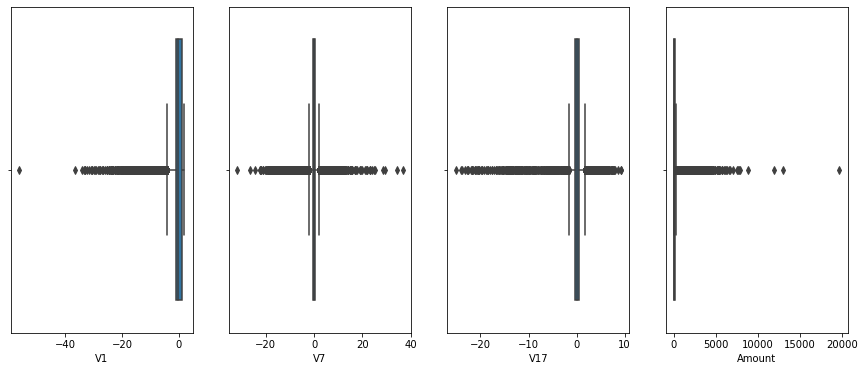

In [10]:
fig,ax=plt.subplots(1,4,figsize=(15,6))
sns.set_style("whitegrid")
sns.boxplot(x=df["V1"],ax=ax[0])
sns.boxplot(x=df["V7"],ax=ax[1])
sns.boxplot(x=df["V17"],ax=ax[2])
sns.boxplot(x=df["Amount"],ax=ax[3])
plt.show()

From the above boxplots, we can see that there are a lot of outliers in our features which will affect the performance of models.

In [11]:
## No other pre-processing seems necessary as dimensionality reduction has already been performed on the data and all the data is numerical.
#The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and 
#the first transaction in the dataset. 
# The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning

In [18]:
# Determining Outlier Fraction
fraud = df[df["Class"]==1]
normal = df[df["Class"]==0]

outlier_frac = len(fraud)/len(normal)
outlier_frac


0.0019972298957002164

## Dividing the data into test and train datasets

In [19]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [20]:
x[0]

array([ 0.00000000e+00, -1.35980713e+00, -7.27811730e-02,  2.53634674e+00,
        1.37815522e+00, -3.38320770e-01,  4.62387778e-01,  2.39598554e-01,
        9.86979010e-02,  3.63786970e-01,  9.07941720e-02, -5.51599533e-01,
       -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,  1.46817697e+00,
       -4.70400525e-01,  2.07971242e-01,  2.57905800e-02,  4.03992960e-01,
        2.51412098e-01, -1.83067780e-02,  2.77837576e-01, -1.10473910e-01,
        6.69280750e-02,  1.28539358e-01, -1.89114844e-01,  1.33558377e-01,
       -2.10530530e-02,  1.49620000e+02])

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [22]:
print("Training data shape x: {} and y:{}".format(xtrain.shape,ytrain.shape))
print("Test data shape x: {} and y:{}".format(xtest.shape,ytest.shape))


Training data shape x: (91659, 30) and y:(91659,)
Test data shape x: (39283, 30) and y:(39283,)


## Functions

In [23]:
def get_scores(y_pred,y_test):
    acc = accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    print("Accuracy",acc)
    print("F1- Score:",f1)
    return acc,f1

In [24]:
def balance(xtrain,ytrain):
    print("Initial class distribution in training set")
    print("-------------------------------------------")
    unique,count=np.unique(ytrain,return_counts=True)
    class_dist = {k:v for (k,v) in zip(unique,count)}
    print(class_dist)
    #for key,value in class_dist:
        #print("{}:{}".format(key,value))
    print("Balancing using SMOTE")
    print("-"*20)
    smt=SMOTE()
    xtrain_sm,ytrain_sm=smt.fit_resample(xtrain,ytrain)
    print("Balancing COMPLETE!\n Distribution after balancing")
    print("-"*20)
    unique2,count2=np.unique(ytrain_sm,return_counts=True)
    class_dist2 = {k:v for (k,v) in zip(unique2,count2)}
    print(class_dist2)
    #for key,value in class_dist2:
        #print("{}:{}".format(key,value))
    return xtrain_sm,ytrain_sm

## Baseline Model

In [25]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred_knn=knn.predict(xtest)

In [27]:
print("Evaluating KNN Classifier ")
print("-"*10)
acc_knn,f1_knn = get_scores(ytest,y_pred_knn)

Evaluating KNN Classifier 
----------
Accuracy 0.9982435150064913
F1- Score: 0.20689655172413793


In [28]:
# The above might be a result of high imbalance in dataset
# Let's check the imbalancce in training set
xtrain_sm,ytrain_sm=balance(xtrain,ytrain)

Initial class distribution in training set
-------------------------------------------
{0.0: 91476, 1.0: 183}
Balancing using SMOTE
--------------------
Balancing COMPLETE!
 Distribution after balancing
--------------------
{0.0: 91476, 1.0: 91476}


In [29]:
# Now training the model on balanced data
knn_bal=KNeighborsClassifier(n_neighbors=3)
knn_bal.fit(xtrain_sm,ytrain_sm)

KNeighborsClassifier(n_neighbors=3)

In [30]:
ypred_knn_bal=knn_bal.predict(xtest)

In [31]:
print("Evaluating balanced KNN Classifier ")
print("-"*10)
acc_knn_bal,f1_knn_bal = get_scores(ytest,ypred_knn_bal)

Evaluating balanced KNN Classifier 
----------
Accuracy 0.9528549245220579
F1- Score: 0.04338842975206611


In [32]:
## We can see that performance increased significantly here. We will try some more models and choose the best one going forward.

#Trying some other models
from sklearn.svm import SVC
sv_classifier = SVC(kernel="linear",probability=True)
sv_classifier.fit(xtrain_sm,ytrain_sm)

ypred_svc = sv_classifier.predict(xtest)

print("Evaluating balanced Support Vector Classifier ")
print("-"*10)
acc_svc,f1_svc = get_scores(ytest,ypred_svc)

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain_sm,ytrain_sm)

GaussianNB()

In [34]:
ypred_nb=nb.predict(xtest)

In [35]:
print("Evaluating balanced Naive Bayes Classifier ")
print("-"*10)
acc_nb,f1_nb = get_scores(ytest,ypred_nb)

Evaluating balanced Naive Bayes Classifier 
----------
Accuracy 0.984828042664766
F1- Score: 0.1745152354570637


In [36]:
# Based upon above results, we finalized KNN as our model

## Using Isolation Forest

In [44]:
#First removing outliers from imbalanced training and test data
from sklearn.ensemble import IsolationForest
# Identifying outliers in the training dataset
iso = IsolationForest(contamination=outlier_frac)
iso.fit(xtrain)

IsolationForest(contamination=0.0019972298957002164)

In [45]:
ypred=iso.predict(xtest)

In [46]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1

In [47]:
print("Evaluating Isolation Forest Algorithm ")
print("-"*10)
acc_if,f1_if = get_scores(ytest,ypred)

Evaluating Isolation Forest Algorithm 
----------
Accuracy 0.9972252628363414
F1- Score: 0.3550295857988166


In [50]:
#Identifying number of anomalies detected
num_if = len(ypred[ypred==1])
print("Number of anomalies detected in test set:{}".format(num_if))

Number of anomalies detected in test set:91


## Minimum Covariance Determinant

In [66]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.covariance import EllipticEnvelope
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=outlier_frac, support_fraction=0.91)
ee.fit(xtrain)

EllipticEnvelope(contamination=0.0019972298957002164, support_fraction=0.91)

In [67]:
ypred_ee= ee.predict(xtest)

In [68]:
ypred_ee[ypred_ee == 1] = 0
ypred_ee[ypred_ee == -1] = 1

In [69]:
print("Evaluating Minimum Covariance Determinant Algorithm ")
print("-"*10)
acc_ee,f1_ee = get_scores(ytest,ypred_ee)

Evaluating Minimum Covariance Determinant Algorithm 
----------
Accuracy 0.9970216124023115
F1- Score: 0.2822085889570552


In [70]:
#Identifying number of anomalies detected
num_ee = len(ypred_ee[ypred_ee==1])
print("Number of anomalies detected in test set:{}".format(num_ee))

Number of anomalies detected in test set:85


## Local Outlier Factor

In [73]:
from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the training dataset
lof = LocalOutlierFactor(contamination = outlier_frac,novelty=True)
lof.fit(xtrain)

LocalOutlierFactor(contamination=0.0019972298957002164, novelty=True)

In [74]:
ypred_lof= lof.predict(xtest)

In [75]:
ypred_lof[ypred_lof == 1] = 0
ypred_lof[ypred_lof == -1] = 1

In [76]:
print("Evaluating Local Outlier Factor Algorithm ")
print("-"*10)
acc_lof,f1_lof = get_scores(ytest,ypred_lof)

Evaluating Local Outlier Factor Algorithm 
----------
Accuracy 0.9961306417534302
F1- Score: 0.06172839506172839


In [78]:
#Identifying number of anomalies detected
num_lof = len(ypred_lof[ypred_lof==1])
print("Number of anomalies detected in test set:{}".format(num_lof))

Number of anomalies detected in test set:84


## One Class SVM

In [79]:
from sklearn.svm import OneClassSVM
# identify outliers in the training dataset
OC_svm = OneClassSVM(nu=outlier_frac)
OC_svm.fit(xtrain)

OneClassSVM(nu=0.0019972298957002164)

In [80]:
ypred_svm= OC_svm.predict(xtest)

In [81]:
ypred_svm[ypred_svm == 1] = 0
ypred_svm[ypred_svm == -1] = 1

In [82]:
print("Evaluating One Class SVM Algorithm ")
print("-"*10)
acc_svm,f1_svm = get_scores(ytest,ypred_svm)

Evaluating One Class SVM Algorithm 
----------
Accuracy 0.9956724282768628
F1- Score: 0.0


In [83]:
#Identifying number of anomalies detected
num_svm = len(ypred_svm[ypred_svm==1])
print("Number of anomalies detected in test set:{}".format(num_svm))

Number of anomalies detected in test set:92


In [84]:
num_outliers =[]
baseline='No outliers removed'
num_outliers.append(baseline)
num_outliers.append(num_if)
num_outliers.append(num_ee)
num_outliers.append(num_lof)
num_outliers.append(num_svm )
num_outliers

['No outliers removed', 91, 85, 84, 92]

In [85]:
accuracy=[]
accuracy.append(acc_knn.round(3))
accuracy.append(acc_if.round(3))
accuracy.append(acc_ee.round(3))
accuracy.append(acc_lof.round(3))
accuracy.append(acc_svm.round(3))
accuracy

[0.998, 0.997, 0.997, 0.996, 0.996]

In [86]:
f1=[]
f1.append(f1_knn.round(3))
f1.append(f1_if.round(3))
f1.append(f1_ee.round(3))
f1.append(f1_lof.round(3))
f1.append(f1_svm.round(3))
f1

[0.207, 0.355, 0.282, 0.062, 0.0]

In [87]:
final_df=pd.DataFrame(list(zip(num_outliers,accuracy,f1)),columns=["Number Of outliers","Accuracy","F1-Score"],index=["K-Nearest Neighbor","Isolation Forest","Minimum Covariance Determinant","Local Outlier Factor","One Class SVM"])
final_df

,Number Of outliers,Accuracy,F1-Score
K-Nearest Neighbor,No outliers removed,0.998,0.207
Isolation Forest,91,0.997,0.355
Minimum Covariance Determinant,85,0.997,0.282
Local Outlier Factor,84,0.996,0.062
One Class SVM,92,0.996,0.000
